In [64]:
import pandas as pd
import numpy as np

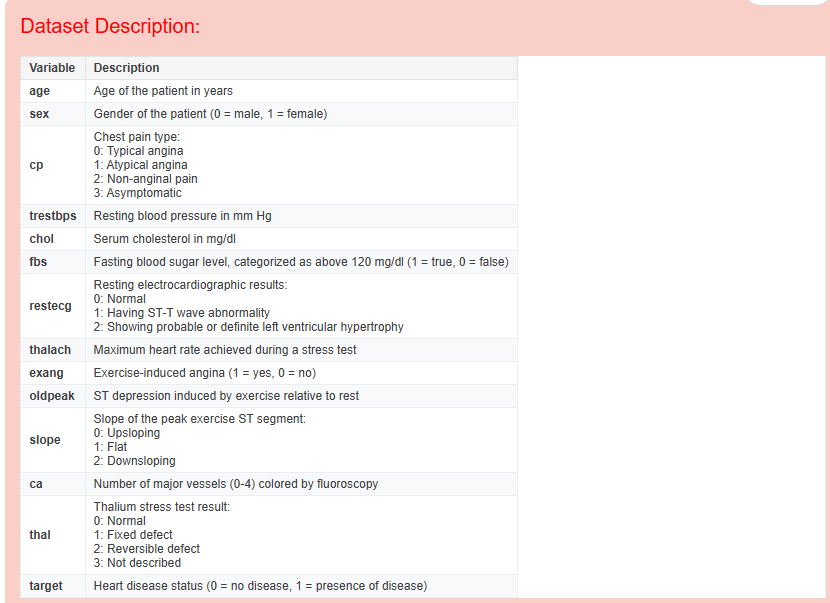

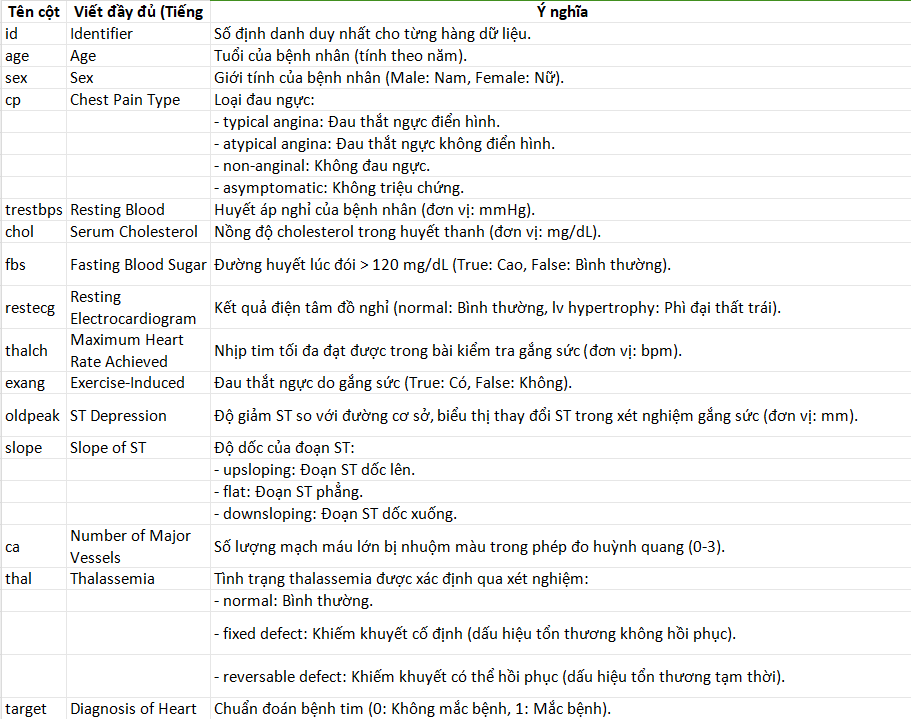

### Mô tả dữ liệu

In [65]:
df_heart = pd.read_csv('heart_disease.csv')
df_heart.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [66]:
df_heart.select_dtypes(include=('int64', 'float64')).head()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,1
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


In [67]:
df_heart.select_dtypes(include=('object')).head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,non-anginal,False,normal,False,downsloping,normal
4,Female,atypical angina,False,lv hypertrophy,False,upsloping,normal


In [68]:
df_heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [69]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


### Tách các đặc trưng số và mục lục(Categories)

In [70]:
numeric_col = ['id', 'age',	'trestbps',	'chol',	'thalch',	'oldpeak',	'ca',	'target']
numeric_col


['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']

In [71]:
categories_col = [column for column in df_heart.columns if column not in numeric_col]
categories_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [72]:
df_numeric = df_heart[numeric_col]
df_numeric = df_numeric.drop(columns='id')
df_numeric

,age,trestbps,chol,thalch,oldpeak,ca,target
0,63,145.0,233.0,150.0,2.3,0.0,0
1,67,160.0,286.0,108.0,1.5,3.0,1
2,67,120.0,229.0,129.0,2.6,2.0,1
3,37,130.0,250.0,187.0,3.5,0.0,0
4,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,NaN,1
916,62,NaN,139.0,NaN,NaN,NaN,0
917,55,122.0,223.0,100.0,0.0,NaN,1
918,58,NaN,385.0,NaN,NaN,NaN,0


### Numeric 

#### Kiểm tra các giá trị bằng 0
- Vì 0 đối với các chỉ số trên là 0 hợp lý điều này gây nhiễu cho bộ data trên, nên cần chuyển về Nan

In [73]:
for col in df_heart[['trestbps', 'chol', 'thalch']]:
    # Đếm số lượng giá trị 0 trước khi thay thế
    zero_count = df_heart[df_heart[col] == 0].shape[0]
    
    # Thay thế giá trị 0 bằng NaN
    df_heart[col] = df_heart[col].replace(0, np.nan)
    
    # In thông tin
    print(f"Column: {col}, Dem_GT_0: {zero_count}")


Column: trestbps, Dem_GT_0: 1
Column: chol, Dem_GT_0: 172
Column: thalch, Dem_GT_0: 0


In [74]:
df_numeric.dtypes

age           int64
trestbps    float64
chol        float64
thalch      float64
oldpeak     float64
ca          float64
target        int64
dtype: object

#### Numeric columns

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df_heart.isna().sum()

id            0
age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

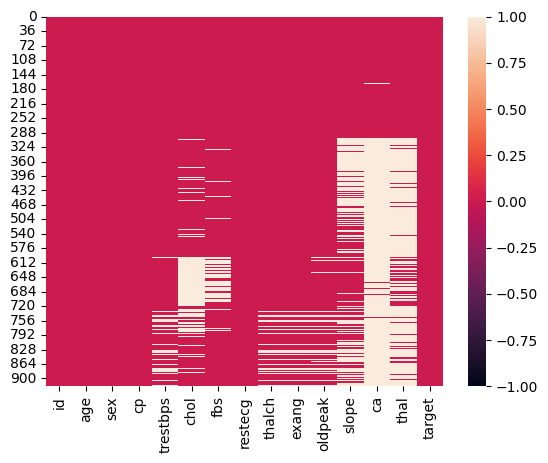

In [77]:
sns.heatmap(df_heart.isna(), vmin=-1, vmax=1);

In [78]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Áp dụng OrdinalEncoder (giữ nguyên giá trị NaN)
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Chỉ encode các cột phân loại
df_heart[categories_col] = ordinal_encoder.fit_transform(df_heart[categories_col])

df_heart.isna().sum()


id            0
age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [79]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import LabelEncoder

# # Tạo bản sao của dữ liệu để xử lý
# # categorical_data = df_heart.copy()

# # Áp dụng Label Encoding tạm thời cho các cột categorical
# label_encoders = {}
# for col in df_heart[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]:
#     le = LabelEncoder()
#     df_heart[col] = le.fit_transform(df_heart[col].astype(object))

#     # Đặt lại NaN sau khi mã hóa
#     df_heart[col] = np.where(df_heart[col].isnull(), np.nan, df_heart[col])
#     label_encoders[col] = le
# df_heart.head(50)

In [80]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    float64
 3   cp        920 non-null    float64
 4   trestbps  860 non-null    float64
 5   chol      718 non-null    float64
 6   fbs       830 non-null    float64
 7   restecg   918 non-null    float64
 8   thalch    865 non-null    float64
 9   exang     865 non-null    float64
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    float64
 12  ca        309 non-null    float64
 13  thal      434 non-null    float64
 14  target    920 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 107.9 KB


In [81]:
# def handle_outliers(data, columns, method='clip', threshold=1.5):
#     for col in columns:
#         if col in data.columns:
#             # Tính toán IQR
#             Q1 = data[col].quantile(0.25)
#             Q3 = data[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
            
#             # Xử lý theo phương pháp
#             if method == 'clip':
#                 data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
#             elif method == 'remove':
#                 data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
#             elif method == 'replace_with_median':
#                 median_value = data[col].median()
#                 data.loc[data[col] < lower_bound, col] = median_value
#                 data.loc[data[col] > upper_bound, col] = median_value
    
#     return data

# # Áp dụng hàm xử lý outliers trên các cột số
# cleaned_data = handle_outliers(df_heart.copy(), columns=numeric_col, method='clip')

# # Kiểm tra lại dữ liệu sau khi xử lý
# cleaned_data.describe()


In [82]:
df_numeric.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')

In [83]:
corr = df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].corr()
corr

,age,trestbps,chol,thalch,oldpeak,ca,target
age,1.000000,0.253042,0.083326,-0.365778,0.258243,0.370416,0.282700
trestbps,0.253042,1.000000,0.088763,-0.102427,0.171562,0.093705,0.116959
chol,0.083326,0.088763,1.000000,-0.047186,0.046960,0.127798,0.118327
thalch,-0.365778,-0.102427,-0.047186,1.000000,-0.151174,-0.264094,-0.394503
oldpeak,0.258243,0.171562,0.046960,-0.151174,1.000000,0.281817,0.385528
ca,0.370416,0.093705,0.127798,-0.264094,0.281817,1.000000,0.455599
target,0.282700,0.116959,0.118327,-0.394503,0.385528,0.455599,1.000000


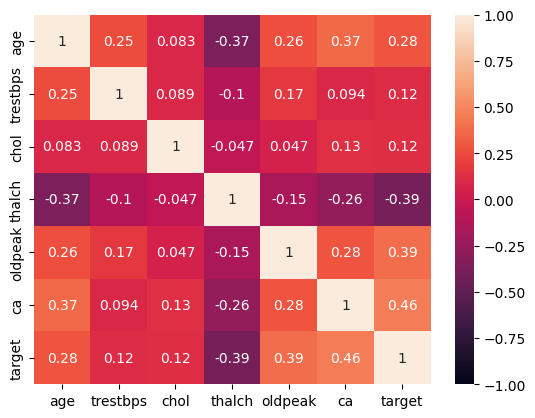

In [84]:
sns.heatmap(data=corr, annot=True,
            vmin=-1, vmax=1);

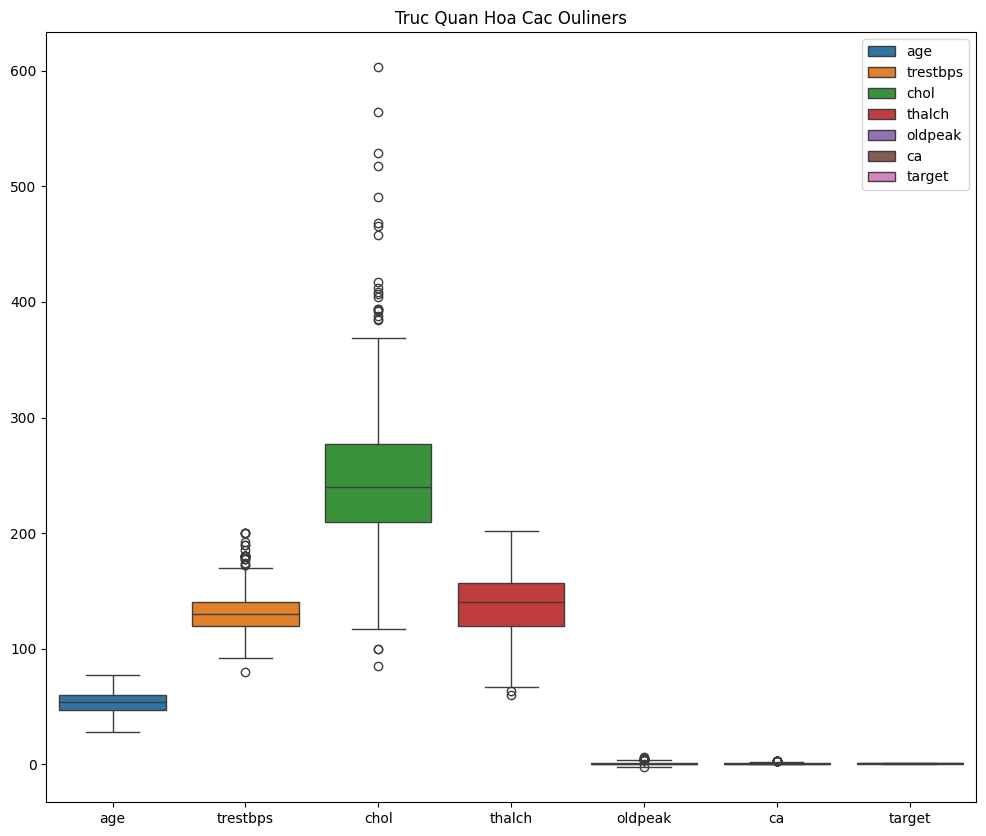

In [85]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']], legend=True);
ax.set(title="Truc Quan Hoa Cac Ouliners");
# ax.get_xticklabels('')

In [86]:
df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,860.000000,718.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.286047,246.832869,137.545665,0.878788,0.676375,0.553261
std,9.424685,18.536175,58.527062,25.926276,1.091226,0.935653,0.497426
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,210.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,239.500000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,276.750000,157.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [87]:
def detect_outliners_without_nan(x):
    # Bỏ qua giá trị NaN khi tính toán
    q1 = np.nanquantile(x, 0.25)
    q3 = np.nanquantile(x, 0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return x[(x<lower_bound)|(x>upper_bound)]
print(detect_outliners_without_nan(df_heart['chol']).value_counts().sum())
print(detect_outliners_without_nan(df_heart['trestbps']).value_counts().sum())
print(detect_outliners_without_nan(df_heart['thalch']).value_counts().sum())
print(detect_outliners_without_nan(df_heart['oldpeak']).value_counts().sum())
print(detect_outliners_without_nan(df_heart['ca']).value_counts().sum())

23
27
2
16
20


In [88]:
outliers_dict = {}
for col in df_numeric.columns:
    outliers_dict[col] = detect_outliners_without_nan(df_heart[col]).value_counts().sum()
outliers_dict


{'age': np.int64(0),
 'trestbps': np.int64(27),
 'chol': np.int64(23),
 'thalch': np.int64(2),
 'oldpeak': np.int64(16),
 'ca': np.int64(20),
 'target': np.int64(0)}

In [89]:
# loại bỏ outliers
for col in df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']]:
    q1 = df_heart[col].quantile(0.25)
    q3 = df_heart[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Lọc dữ liệu trong khoảng hợp lý
    # kết hợp giữ lại điều kiện nan và khoảng tứ phân vị
    df_heart = df_heart[(df_heart[col].isna()) | (df_heart[col] >= lower_bound) & (df_heart[col] <= upper_bound)]

df_heart

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
2,3,67,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0
5,6,56,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,915,46,1.0,0.0,134.0,310.0,0.0,1.0,126.0,0.0,0.0,NaN,NaN,1.0,1
915,916,54,0.0,0.0,127.0,333.0,1.0,2.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,917,62,1.0,3.0,NaN,139.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,1.0,0.0,122.0,223.0,1.0,2.0,100.0,0.0,0.0,NaN,NaN,0.0,1


#### Xử lý outliners


In [90]:
# def bound(x):
#     # Bỏ qua giá trị NaN khi tính toán
#     q1 = np.nanquantile(x, 0.25)  # Tính Q1, bỏ qua NaN
#     q3 = np.nanquantile(x, 0.75)  # Tính Q3, bỏ qua NaN
#     IQR = q3 - q1
#     lower_bound = q1 - 1.5 * IQR
#     upper_bound = q3 + 1.5 * IQR
#     return [lower_bound, upper_bound]



In [91]:
# outliers = {}
# for col in numeric_col:
#     Q1 = df_numeric[col].quantile(0.25)
#     Q3 = df_numeric[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers[col] = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)]


# # df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# data_cleaned = df_numeric.copy()
# data_cleaned

In [92]:
# data_cleaned = df_numeric.copy()
# for col in numeric_col:
#     Q1 = df_numeric[col].quantile(0.25)
#     Q3 = df_numeric[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]


# data_cleaned

In [93]:
df_heart.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,841.000000,841.000000,841.000000,841.000000,782.000000,649.000000,757.00000,839.000000,787.000000,787.000000,780.000000,549.000000,272.000000,387.000000,841.000000
mean,465.159334,53.224732,0.793103,0.807372,130.430946,240.602465,0.15852,1.002384,138.044473,0.377382,0.812949,1.256831,0.511029,1.317829,0.538644
std,265.201618,9.469910,0.405322,0.961642,16.281053,46.525438,0.36547,0.623711,25.950958,0.485040,0.993224,0.614287,0.723784,0.655600,0.498801
min,1.000000,28.000000,0.000000,0.000000,92.000000,117.000000,0.00000,0.000000,63.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,245.000000,47.000000,1.000000,0.000000,120.000000,208.000000,0.00000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,464.000000,54.000000,1.000000,0.000000,130.000000,236.000000,0.00000,1.000000,140.000000,0.000000,0.400000,1.000000,0.000000,1.000000,1.000000
75%,695.000000,60.000000,1.000000,2.000000,140.000000,272.000000,0.00000,1.000000,159.000000,1.000000,1.500000,2.000000,1.000000,2.000000,1.000000
max,920.000000,77.000000,1.000000,3.000000,170.000000,369.000000,1.00000,2.000000,202.000000,1.000000,3.700000,2.000000,2.000000,2.000000,1.000000


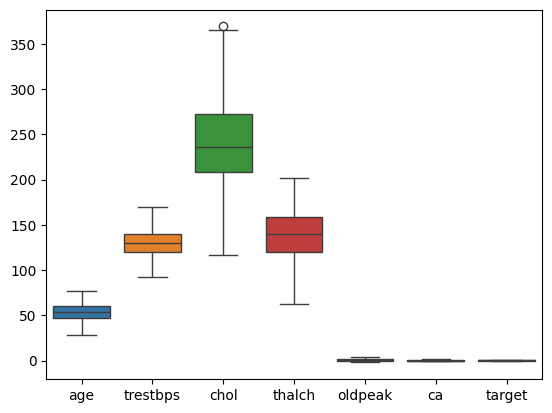

In [94]:
sns.boxplot(data=df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']]);

In [95]:
df_heart.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,841.000000,841.000000,841.000000,841.000000,782.000000,649.000000,757.00000,839.000000,787.000000,787.000000,780.000000,549.000000,272.000000,387.000000,841.000000
mean,465.159334,53.224732,0.793103,0.807372,130.430946,240.602465,0.15852,1.002384,138.044473,0.377382,0.812949,1.256831,0.511029,1.317829,0.538644
std,265.201618,9.469910,0.405322,0.961642,16.281053,46.525438,0.36547,0.623711,25.950958,0.485040,0.993224,0.614287,0.723784,0.655600,0.498801
min,1.000000,28.000000,0.000000,0.000000,92.000000,117.000000,0.00000,0.000000,63.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,245.000000,47.000000,1.000000,0.000000,120.000000,208.000000,0.00000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,464.000000,54.000000,1.000000,0.000000,130.000000,236.000000,0.00000,1.000000,140.000000,0.000000,0.400000,1.000000,0.000000,1.000000,1.000000
75%,695.000000,60.000000,1.000000,2.000000,140.000000,272.000000,0.00000,1.000000,159.000000,1.000000,1.500000,2.000000,1.000000,2.000000,1.000000
max,920.000000,77.000000,1.000000,3.000000,170.000000,369.000000,1.00000,2.000000,202.000000,1.000000,3.700000,2.000000,2.000000,2.000000,1.000000


In [96]:
df_numeric.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')

In [97]:
# from sklearn.impute import KNNImputer

# # Tạo đối tượng KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=5)  # n_neighbors: số lượng hàng lân cận

# # Áp dụng KNN Imputer để điền dữ liệu
# df_numeric= knn_imputer.fit_transform(df_numeric)
# df_numeric = pd.DataFrame(df_numeric, columns=['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'])
# df_numeric

In [98]:
df_heart.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [99]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Khởi tạo MICE imputer
imputer = IterativeImputer(max_iter=20, random_state=0)
df_heart = imputer.fit_transform(df_heart)
df_heart = pd.DataFrame(df_heart, columns=['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                                            'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
df_heart

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1.0,63.0,1.0,3.0,145.000000,233.0,1.0,0.0,150.000000,0.000000,2.300000,0.000000,0.000000,0.000000,0.0
1,3.0,67.0,1.0,0.0,120.000000,229.0,0.0,0.0,129.000000,1.000000,2.600000,1.000000,2.000000,2.000000,1.0
2,4.0,37.0,1.0,2.0,130.000000,250.0,0.0,1.0,187.000000,0.000000,3.500000,0.000000,0.000000,1.000000,0.0
3,5.0,41.0,0.0,1.0,130.000000,204.0,0.0,0.0,172.000000,0.000000,1.400000,2.000000,0.000000,1.000000,0.0
4,6.0,56.0,1.0,1.0,120.000000,236.0,0.0,1.0,178.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,915.0,46.0,1.0,0.0,134.000000,310.0,0.0,1.0,126.000000,0.000000,0.000000,1.370791,0.959421,1.000000,1.0
837,916.0,54.0,0.0,0.0,127.000000,333.0,1.0,2.0,154.000000,0.000000,0.000000,1.484873,1.326924,1.336162,1.0
838,917.0,62.0,1.0,3.0,134.798875,139.0,0.0,2.0,124.524963,0.059677,0.348599,1.275751,0.770951,1.289178,0.0
839,918.0,55.0,1.0,0.0,122.000000,223.0,1.0,2.0,100.000000,0.000000,0.000000,1.121184,1.211385,0.000000,1.0


In [100]:
df_heart.isna().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [101]:
# df_heart = round(df_heart)
df_heart.round()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1.0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.0,0.0,0.0,0.0,0.0
1,3.0,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,3.0,1.0,2.0,2.0,1.0
2,4.0,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,4.0,0.0,0.0,1.0,0.0
3,5.0,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.0,2.0,0.0,1.0,0.0
4,6.0,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,1.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,915.0,46.0,1.0,0.0,134.0,310.0,0.0,1.0,126.0,0.0,0.0,1.0,1.0,1.0,1.0
837,916.0,54.0,0.0,0.0,127.0,333.0,1.0,2.0,154.0,0.0,0.0,1.0,1.0,1.0,1.0
838,917.0,62.0,1.0,3.0,135.0,139.0,0.0,2.0,125.0,0.0,0.0,1.0,1.0,1.0,0.0
839,918.0,55.0,1.0,0.0,122.0,223.0,1.0,2.0,100.0,0.0,0.0,1.0,1.0,0.0,1.0


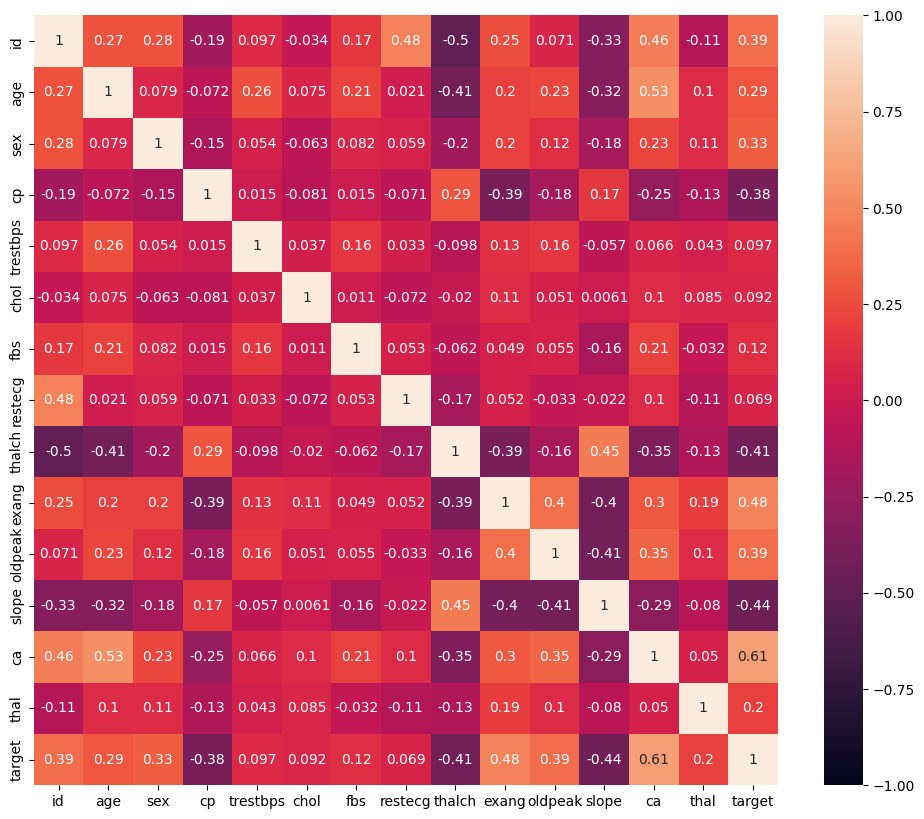

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(df_heart.corr(), annot=True, vmin=-1, vmax=1);

In [104]:
df_heart = df_heart.round()
df_heart.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1.0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.0,0.0,0.0,0.0,0.0
1,3.0,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,3.0,1.0,2.0,2.0,1.0
2,4.0,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,4.0,0.0,0.0,1.0,0.0
3,5.0,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.0,2.0,0.0,1.0,0.0
4,6.0,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,1.0,2.0,0.0,1.0,0.0


In [105]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from scipy.stats import shapiro, bartlett
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.formula.api import ols
# from sklearn.feature_selection import f_regression


# X = df_heart.drop(columns=['target'])
# y = df_heart['target']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # pca 
# pca = PCA()
# pca.fit(X_scaled)


# # Ti le phuong sai
# # Khoant tin cay
# explained_var = pca.explained_variance_ratio_
# print(f'Ty le phuong sai giai thich', explained_var)


# # chon tren phuong sai tich luy
# cumsum_explained_var = np.cumsum(pca.explained_variance_ratio_)
# print(f'Phuong sai tich luy', cumsum_explained_var)

# # lua chon thanh phan chinh
# n_components = np.argmax(cumsum_explained_var >= 0.8)+1
# print(f'So luong thanh phan chinh duoc chon la: {n_components}')


# pca= PCA(n_components=n_components)
# X_pca_reduced = pca.fit_transform(X_scaled)
# print(X_pca_reduced)


# model = LogisticRegression(fit_intercept=True)
# model.fit(X_pca_reduced, y)
# a = model.intercept_
# b=model.coef_
# print(a, b)



# model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
# print(model_pca.summary())

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import shapiro, bartlett
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression


In [120]:
X = df_heart.drop(columns=['target'])
y = df_heart['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.75125454,  1.03285927,  0.51075392, ..., -2.27689032,
        -1.06378681, -2.40468378],
       [-1.74370862,  1.45550111,  0.51075392, ..., -0.57327399,
         2.10309712,  1.73097892],
       [-1.73993566, -1.7143127 ,  0.51075392, ..., -2.27689032,
        -1.06378681, -0.33685243],
       ...,
       [ 1.7047767 ,  0.92719881,  0.51075392, ..., -0.57327399,
         0.51965515, -0.33685243],
       [ 1.70854966,  0.18757559,  0.51075392, ..., -0.57327399,
         0.51965515, -2.40468378],
       [ 1.71609558,  0.92719881,  0.51075392, ..., -0.57327399,
         0.51965515, -0.33685243]])

In [121]:
# pca 
pca = PCA()
pca.fit(X_scaled)

PCA()

In [109]:
# Ti le phuong sai
# Khoant tin cay
explained_var = pca.explained_variance_ratio_
print(f'Ty le phuong sai giai thich', explained_var)

Ty le phuong sai giai thich [0.24838013 0.11081412 0.09339847 0.07442781 0.06940675 0.06636767
 0.0638559  0.05679821 0.05389667 0.05181626 0.03503143 0.02933855
 0.02757742 0.0188906 ]


In [110]:
# chon tren phuong sai tich luy
cumsum_explained_var = np.cumsum(pca.explained_variance_ratio_)
print(f'Phuong sai tich luy', cumsum_explained_var)

Phuong sai tich luy [0.24838013 0.35919426 0.45259273 0.52702054 0.59642729 0.66279495
 0.72665086 0.78344907 0.83734573 0.88916199 0.92419342 0.95353198
 0.9811094  1.        ]


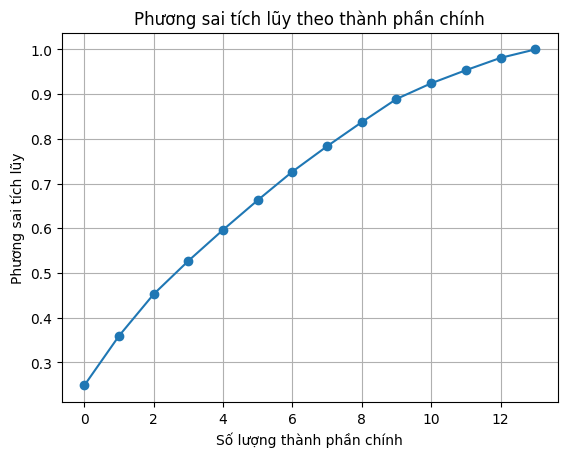

In [111]:
# Vẽ biểu đồ phương sai tích lũy
plt.plot(cumsum_explained_var, marker='o')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.title('Phương sai tích lũy theo thành phần chính')
plt.grid()
plt.show()

In [112]:
# lua chon thanh phan chinh
n_components = np.argmax(cumsum_explained_var >= 0.8)+1
print(f'So luong thanh phan chinh duoc chon la: {n_components}')

So luong thanh phan chinh duoc chon la: 9


In [113]:
pca= PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)
X_pca_reduced

array([[ 0.41199248, -0.49890271,  3.83227169, ...,  1.21035147,
         0.55525584,  1.61293305],
       [-2.10453551, -3.48024587, -0.02392835, ..., -0.23432595,
        -0.79930647, -1.1994689 ],
       [ 1.19666866, -1.8083032 ,  0.26063504, ...,  1.48504867,
        -0.54669016,  2.32270078],
       ...,
       [-0.58611624,  3.21059308,  0.7379795 , ..., -1.96358854,
        -0.75065036,  0.59294333],
       [-1.66634344,  3.61407533,  0.33130947, ...,  1.29433814,
         1.33159394, -0.37256676],
       [-1.85768918,  0.04058321, -0.45894393, ..., -0.83867447,
        -0.25850103,  0.50125168]])

In [133]:
# Chia dữ liệu thành Train và Test
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

# Huấn luyện Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Intercept và Coefficients
intercept = model.intercept_
coefficients = model.coef_
print(f'He so chan Intercept: {intercept}')
print(f'He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: {coefficients}')
print('--================================--')
# Dự đoán trên tập Test
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print('--================================--')
print("Classification Report:\n", classification_report(y_test, y_pred))


He so chan Intercept: [0.32089098]
He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: [[-1.30709926 -0.52278039 -0.32455819 -0.13762668  0.13564951 -0.3835981
   0.49228612 -0.42704688 -0.1111389 ]]
--================================--
Accuracy: 0.8106508875739645
--================================--
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.78      0.80        82
         1.0       0.80      0.84      0.82        87

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.81      0.81      0.81       169



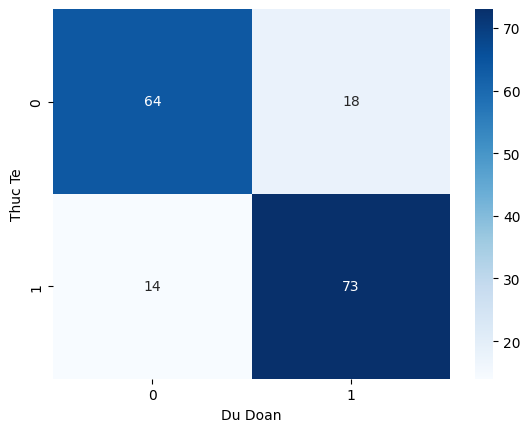

In [132]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True);
plt.xlabel('Du Doan')
plt.ylabel("Thuc Te");

### Test

In [116]:
for
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

SyntaxError: invalid syntax (2670291744.py, line 1)

In [ ]:
X_pca_reduced = np.delete(X_pca_reduced, 5, axis=1)
X_pca_reduced.shape

In [ ]:
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

In [ ]:
X_pca_reduced = np.delete(X_pca_reduced, 7, axis=1)
X_pca_reduced.shape

In [ ]:
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

In [ ]:
X_pca_reduced = np.delete(X_pca_reduced, 4, axis=1)
X_pca_reduced.shape

In [ ]:
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

### Categories 

In [ ]:
df_categories = df_heart[categories_col]
df_categories.head()

In [ ]:
df_categories.info()

In [ ]:
df_categories.describe()

In [ ]:
df_categories.isna().sum()


In [ ]:
sns.heatmap(df_categories.isna());

In [57]:
# df_categories = pd.get_dummies(df_categories, columns=df_categories.columns, drop_first=True).astype(int)
# df_categories.isna().sum()

## Mức độ dễ (3 câu hỏi)


### Câu hỏi 1: Bao nhiêu phần trăm bệnh nhân trong dữ liệu được chẩn đoán mắc bệnh tim (target = 1)?
- Mục đích: Hiểu tỷ lệ mắc bệnh tim trong tập dữ liệu.

In [ ]:
# Phan tram benh nhan mac benh
mac_benh =(len(df_numeric[df_numeric['target']==1])/len(df_numeric))*100
print(f'Ti le mac benh la {mac_benh:.2f}%')

### Câu hỏi 2: Tỷ lệ giữa nam (Male) và nữ (Female) trong dữ liệu là bao nhiêu?
- Mục đích: Phân bố giới tính của bệnh nhân trong tập dữ liệu.

In [ ]:
# Ty le nam nu
sns.barplot(data=df_categories['sex']);

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_heart, x='cp', y='age');

### Câu hỏi 3: Độ tuổi trung bình của bệnh nhân trong dữ liệu là bao nhiêu?
- Mục đích: Hiểu nhóm tuổi phổ biến trong tập dữ liệu.

In [ ]:
df_heart['age'].mean()

## Mức độ trung bình (4 câu hỏi)


### Câu hỏi 4: Có sự khác biệt nào về tỷ lệ mắc bệnh tim (target) giữa nam và nữ không?
- Mục đích: Tìm hiểu sự liên quan giữa giới tính và khả năng mắc bệnh tim.

In [ ]:
# Tính tỷ lệ mắc bệnh tim theo giới tính
gender_target = df_heart.groupby('sex')['target'].value_counts()
print(gender_target)



In [ ]:
male = df_heart[df_heart['sex']=='Male']
male_target = df_heart[(df_heart['sex']=='Male')&(df_heart['target']==1)]
male_percent = len(male_target)/len(male)*100
print(f'Phan tram mac benh o nam la: {male_percent:.2f}%')


female = df_heart[df_heart['sex']=='Female']
female_target = df_heart[(df_heart['sex']=='Female')&(df_heart['target']==1)]
female_percent = len(female_target)/len(female)*100
print(f'Phan tram mac benh o nam la: {female_percent:.2f}%')

### Câu hỏi 5: Nhóm đau ngực nào (cp) phổ biến nhất ở những bệnh nhân không mắc bệnh tim (target = 0)?
- Mục đích: Phân tích kiểu đau ngực ở nhóm không mắc bệnh.

In [ ]:
cp_target_0=df_heart['cp'][df_heart['target']==0].value_counts()
cp_target_0

In [ ]:
df_cp_target_0 = cp_target_0.reset_index()
# Đổi tên các cột cho dễ hiểu
df_cp_target_0.columns = ['cp', 'values']
df_cp_target_0.head()

In [ ]:
sns.barplot(df_cp_target_0, x='cp', y='values');

### Câu hỏi 6: Huyết áp nghỉ (trestbps) trung bình của bệnh nhân mắc bệnh tim so với bệnh nhân không mắc bệnh có khác biệt không?
- Mục đích: Xem xét mối liên hệ giữa huyết áp và bệnh tim.

In [ ]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
print(f'''Huyet ap luc nghi cua nguoi mac benh {trestbps_target_1}\n
Huyet ap luc nghi cua nguoi ko mac benh {trestbps_target_2}''')

In [ ]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
df_trestbps_target_1 = trestbps_target_1.reset_index()
df_trestbps_target_1.columns=['index', 'values']
df_trestbps_target_1

In [ ]:
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
df_trestbps_target_2 = trestbps_target_2.reset_index()
df_trestbps_target_2.columns=['index', 'values']
df_trestbps_target_2

In [ ]:
df_merge_trestpbs = pd.merge(df_trestbps_target_1, df_trestbps_target_2, how='inner', on=['index'])
df_merge_trestpbs

In [ ]:
sns.barplot(data=df_merge_trestpbs);

### Câu hỏi 7: Nhóm bệnh nhân có giá trị cholesterol (chol) trung bình cao hơn hay thấp hơn những người không mắc bệnh tim?
- Mục đích: Đánh giá mối quan hệ giữa nồng độ cholesterol và bệnh tim.

In [ ]:
chol_targer_1 = df_heart['chol'][df_heart['target']==1].mean()
chol_target_0 = df_heart['chol'][df_heart['target']==0].mean()
print(chol_target_0, chol_targer_1)

In [ ]:
df_chol_target_1 = df_heart[df_heart['target']==1]
df_chol_target_1.describe(include='all')

In [ ]:
df_chol_target_0 = df_heart[df_heart['target']==0]
df_chol_target_0.describe(include='all')

In [ ]:
sns.boxplot(data=df_heart, x='target', y='chol')
plt.title('Cholesterol Distribution by Target')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Cholesterol');

In [ ]:
df_chol_target_0[df_chol_target_0[['chol']].isna().any(axis=1)]

In [ ]:
df_chol_target_0 = df_chol_target_0.dropna(subset='chol')
df_chol_target_0

In [ ]:
lower = bound(df_chol_target_0['chol'])[0]
upper = bound(df_chol_target_0['chol'])[1]
lower, upper

In [ ]:
# Loai bo outliners
df_chol_target_0